In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
def V_q(r,r_q,q):
    d12 = np.sqrt((r[0]-r_q[0])**2 + (r[1]-r_q[1])**2)
    return q/d12

def V_tot(r,r_qs,qs):
    V = np.zeros_like(r[0])
    for i in range(len(qs)):
        Vqi = V_q(r,np.array(r_qs[i]),qs[i])
        V += Vqi
    return V

def E_q(r,r_q,q):
    d32 = ((r[0]-r_q[0])**2 + (r[1]-r_q[1])**2)**1.5
    return (q*(r[0]-r_q[0]))/d32 , (q*(r[1]-r_q[1]))/d32

def E_tot(r,r_qs,qs):
    Ex,Ey = np.zeros_like(r[0]) , np.zeros_like(r[1])
    for i in range(len(qs)):
        E = E_q(r,np.array(r_qs[i]),qs[i])
        Ex += E[0]
        Ey += E[1]
    return Ex,Ey

In [3]:
x,y = np.linspace(-1,1,120) , np.linspace(-0.25,1,120)
XX , YY = np.meshgrid(x,y)

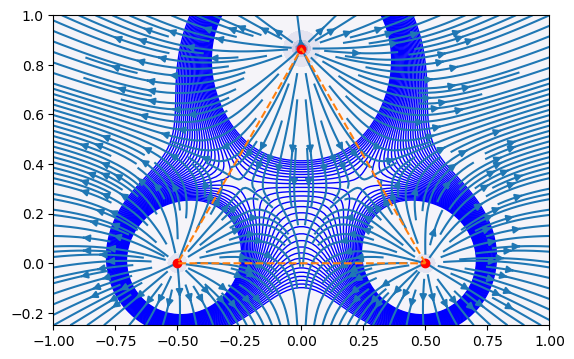

In [4]:
qs = [1,1,2]
r_qs = [[0.5,0],[-0.5,0],[0,np.sqrt(3)/2]]
Ex,Ey = E_tot([XX,YY],r_qs,qs)
V = V_tot([XX,YY],r_qs,qs)
niveles = np.linspace(6,7.5,30)
plt.contourf(XX,YY,V,cmap='Purples')
plt.contour(XX,YY,V,levels=niveles,colors='b',linewidths=(1,))
plt.streamplot(XX,YY,Ex,Ey,density=2)
for i in range(len(r_qs)):
    plt.plot(r_qs[i][0],r_qs[i][1],'ro')
plt.plot([0.5,0,-0.5,0.5],[0,np.sqrt(3)/2,0,0],'--')
plt.gca().set_aspect('equal')
plt.show()

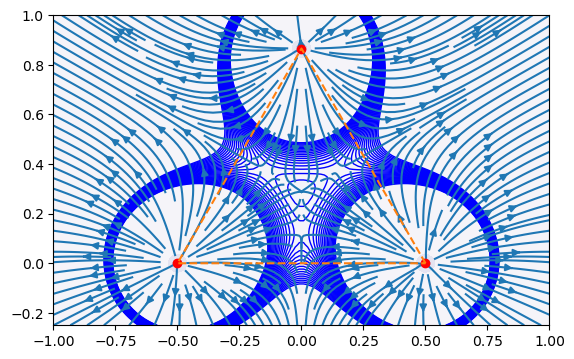

In [5]:
qs = [1,1,1]
r_qs = [[0.5,0],[-0.5,0],[0,np.sqrt(3)/2]]
Ex,Ey = E_tot([XX,YY],r_qs,qs)
V = V_tot([XX,YY],r_qs,qs)
niveles = np.linspace(5,5.5,30)
plt.contourf(XX,YY,V,cmap='Purples')
plt.contour(XX,YY,V,levels=niveles,colors='b',linewidths=(1,))
plt.streamplot(XX,YY,Ex,Ey,density=2)
for i in range(len(r_qs)):
    plt.plot(r_qs[i][0],r_qs[i][1],'ro')
plt.plot([0.5,0,-0.5,0.5],[0,np.sqrt(3)/2,0,0],'--')
plt.gca().set_aspect('equal')
plt.show()

In [6]:
# Sistema de ecuaciones
def equations(var,q=2):
    x, y = var
    rqd = ( (x-0.5)**2 + y**2 )**1.5
    rqi = ( (x+0.5)**2 + y**2 )**1.5
    r2q = ( x**2 + (y-0.5*np.sqrt(3))**2 )**1.5
    Ex = (x-0.5)/rqd + (x+0.5)/rqi + q*x/r2q
    Ey = y/rqd + y/rqi + q*(y-0.5*np.sqrt(3))/r2q
    return (Ex,Ey)

In [7]:
# Punto inicial
x0 = np.array([0.25, 0.3])

# Resolver el sistema
sol, info, st, msg = fsolve(equations, x0, full_output=True)

print("Solucion: x = ", sol[0] , " y = " , sol[1])

Solucion: x =  0.24001903928239174  y =  0.32119963096179843


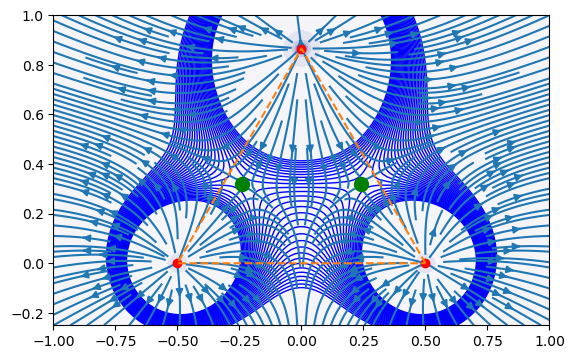

In [8]:
qs = [1,1,2]
r_qs = [[0.5,0],[-0.5,0],[0,np.sqrt(3)/2]]
Ex,Ey = E_tot([XX,YY],r_qs,qs)
V = V_tot([XX,YY],r_qs,qs)
niveles = np.linspace(6,7.5,30)
plt.contourf(XX,YY,V,cmap='Purples')
plt.contour(XX,YY,V,levels=niveles,colors='b',linewidths=(1,))
plt.streamplot(XX,YY,Ex,Ey,density=2)
for i in range(len(r_qs)):
    plt.plot(r_qs[i][0],r_qs[i][1],'ro')
plt.plot([0.5,0,-0.5,0.5],[0,np.sqrt(3)/2,0,0],'--')
plt.plot(sol[0],sol[1],'go',markersize=10)
plt.plot(-sol[0],sol[1],'go',markersize=10)
plt.gca().set_aspect('equal')
plt.show()

In [9]:
x0 = np.array([0.2, 0.3])
sol, info, st, msg = fsolve(equations, x0, args=(1,), full_output=True)
print(f"Solucion: x = {sol[0]:.4f}, y = {sol[1]:.4f}")
x0 = np.array([0.0, 0.3])
sol_x0, info, st, msg = fsolve(equations, x0, args=(1,), full_output=True)
print(f"Solucion: x = {sol_x0[0]:.4f}, y = {sol_x0[1]:.4f}")
x0 = np.array([0.0, 0.15])
sol_x0b, info, st, msg = fsolve(equations, x0, args=(1,), full_output=True)
print(f"Solucion: x = {sol_x0b[0]:.4f}, y = {sol_x0b[1]:.4f}")

Solucion: x = 0.1424, y = 0.3709
Solucion: x = 0.0000, y = 0.2887
Solucion: x = 0.0000, y = 0.1243


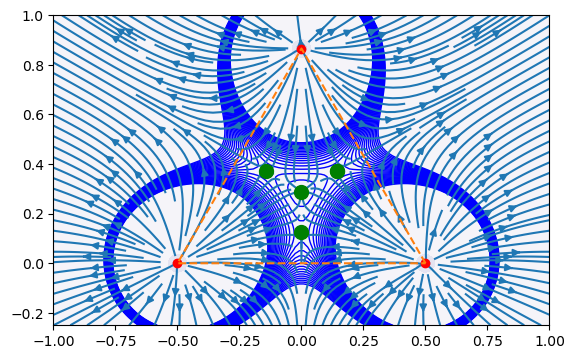

In [10]:
qs = [1,1,1]
r_qs = [[0.5,0],[-0.5,0],[0,np.sqrt(3)/2]]
Ex,Ey = E_tot([XX,YY],r_qs,qs)
V = V_tot([XX,YY],r_qs,qs)
niveles = np.linspace(5,5.5,30)
plt.contourf(XX,YY,V,cmap='Purples')
plt.contour(XX,YY,V,levels=niveles,colors='b',linewidths=(1,))
plt.streamplot(XX,YY,Ex,Ey,density=2)
for i in range(len(r_qs)):
    plt.plot(r_qs[i][0],r_qs[i][1],'ro')
plt.plot([0.5,0,-0.5,0.5],[0,np.sqrt(3)/2,0,0],'--')
plt.plot(sol[0],sol[1],'go',markersize=10)
plt.plot(-sol[0],sol[1],'go',markersize=10)
plt.plot(sol_x0[0],sol_x0[1],'go',markersize=10)
plt.plot(sol_x0b[0],sol_x0b[1],'go',markersize=10)
plt.plot(sol[0],sol[1],'go',markersize=10)
plt.gca().set_aspect('equal')
plt.show()